# 🚗Sports Car Price Analysis

Author: Yanjun He, yanjunh4@uci.edu

Course Project, UC Irvine, Math 10, F23

## ✨Introduction

The project is about analyzing the price of sports cars. I am a big fan of sports cars and I've been paying very close attention to the models and prices of different brands of sports cars.  Therefore, I think it will be very interesting to analysis this dataset .

I am going analyze the dataset to answer the folllowing questions:
1.Does the configuration of the car have anything to do with the price?( Based on this dataset)
2.Can we use those configurations to predict the price of a car?( Based on this dataset)
3.What price appear the most common in this dataframe?

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

## 🚗Defination and Description 
All the explanations are come from Kaggle websit:https://www.kaggle.com/datasets/rkiattisak/sports-car-prices-dataset

Here are some brief explanations of the columns in this dataset:
Car Make---The make of the sports car(The brands of sports cars)
Car Model---The model of the sports car
Year---The year of production of the sports car
Engine Size (L)---The size of the sports car's engine in liters
Horsepower---he horsepower of the sports car
Torque (lb-ft)---The torque of the sports car in pound-feet
0-60 MPH Time---The time it takes for the sports car to accelerate from 0 to 60 miles per hour
Price (in USD)---The price of the sports car in US dollars


## 🚗Overview of Dataset

Load the dataset and name it "df".

In [ ]:
df = pd.read_csv("Sportcarprice.csv") 
df

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"
...,...,...,...,...,...,...,...,...
1002,Koenigsegg,Jesko,2022,5,1280,1106,2.5,"3,000,000"
1003,Lotus,Evija,2021,Electric Motor,1972,1254,2,"2,000,000"
1004,McLaren,Senna,2021,4,789,590,2.7,"1,000,000"
1005,Pagani,Huayra,2021,6,764,738,3,"2,600,000"


## 🧹Data Cleaning

Check the shape of the dataframe.

In [ ]:
df.shape

(1007, 8)

Now there are 995 rows and 8 columns in the dataset.

Check is there is any missing values in the dataset.

In [ ]:
df.isna().any()

Car Make                   False
Car Model                  False
Year                       False
Engine Size (L)             True
Horsepower                 False
Torque (lb-ft)              True
0-60 MPH Time (seconds)    False
Price (in USD)             False
dtype: bool

We can see there are 2 columns contain missing value:  Engine Size(L) and Torque. 

Now, remove the rows that contain the missing values.

In [ ]:
df=df.dropna(axis=0)
df

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"
...,...,...,...,...,...,...,...,...
1002,Koenigsegg,Jesko,2022,5,1280,1106,2.5,"3,000,000"
1003,Lotus,Evija,2021,Electric Motor,1972,1254,2,"2,000,000"
1004,McLaren,Senna,2021,4,789,590,2.7,"1,000,000"
1005,Pagani,Huayra,2021,6,764,738,3,"2,600,000"


Check the shape of "df" again.

In [ ]:
df.shape

(995, 8)

After removing the missing value, there are 995 rows and 8 columns in this dataset.

## 👀Observing the Dataset

Check the data type of each column.

In [ ]:
df.dtypes

Car Make                   object
Car Model                  object
Year                        int64
Engine Size (L)            object
Horsepower                 object
Torque (lb-ft)             object
0-60 MPH Time (seconds)    object
Price (in USD)             object
dtype: object

Change the type of Price from "object" to "integer". For this code, I got help from datacampe: https://www.datacamp.com/tutorial/python-data-type-conversion

In [ ]:
df['Price (in USD)'] = df['Price (in USD)'].str.replace(',', '').astype(int)
df

/tmp/ipykernel_207/217902949.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price (in USD)'] = df['Price (in USD)'].str.replace(',', '').astype(int)


,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,101200
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,274390
2,Ferrari,488 GTB,2022,3.9,661,561,3,333750
3,Audi,R8,2022,5.2,562,406,3.2,142700
4,McLaren,720S,2021,4,710,568,2.7,298000
...,...,...,...,...,...,...,...,...
1002,Koenigsegg,Jesko,2022,5,1280,1106,2.5,3000000
1003,Lotus,Evija,2021,Electric Motor,1972,1254,2,2000000
1004,McLaren,Senna,2021,4,789,590,2.7,1000000
1005,Pagani,Huayra,2021,6,764,738,3,2600000


Check how many sports car brands are here in this dataset.

In [ ]:
df["Car Make"].unique ()

array(['Porsche', 'Lamborghini', 'Ferrari', 'Audi', 'McLaren', 'BMW',
       'Mercedes-Benz', 'Chevrolet', 'Ford', 'Nissan', 'Aston Martin',
       'Bugatti', 'Dodge', 'Jaguar', 'Koenigsegg', 'Lexus', 'Lotus',
       'Maserati', 'Alfa Romeo', 'Ariel', 'Bentley', 'Mercedes-AMG',
       'Pagani', 'Polestar', 'Rimac', 'Acura', 'Mazda', 'Rolls-Royce',
       'Tesla', 'Toyota', 'W Motors', 'Shelby', 'TVR', 'Subaru',
       'Pininfarina', 'Kia', 'Alpine', 'Ultima'], dtype=object)

In [ ]:
len(df["Car Make"].unique ())

38

In [ ]:
df["Car Make"].value_counts()

Porsche          86
McLaren          75
Audi             71
Lamborghini      66
BMW              63
Chevrolet        60
Ferrari          55
Mercedes-Benz    54
Aston Martin     50
Ford             48
Dodge            41
Nissan           37
Lotus            34
Jaguar           30
Lexus            26
Bentley          25
Maserati         24
Bugatti          23
Alfa Romeo       16
Acura            16
Koenigsegg       15
Tesla            14
Pagani           12
Rimac            11
Mercedes-AMG     11
Rolls-Royce      10
Toyota            5
Subaru            3
W Motors          3
TVR               2
Pininfarina       2
Polestar          1
Shelby            1
Ariel             1
Alpine            1
Mazda             1
Ultima            1
Kia               1
Name: Car Make, dtype: int64

I just want the top 10 brands to be appeared in the dataframe.Make a new dataframe contain only the top 10 sports car brand and name it df2.

In [ ]:
top_brands = df["Car Make"].value_counts().index[:10]
top_brands

Index(['Porsche', 'McLaren', 'Audi', 'Lamborghini', 'BMW', 'Chevrolet',
       'Ferrari', 'Mercedes-Benz', 'Aston Martin', 'Ford'],
      dtype='object')

In [ ]:
df2=df[df["Car Make"].isin(top_brands)]
df2

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,101200
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,274390
2,Ferrari,488 GTB,2022,3.9,661,561,3,333750
3,Audi,R8,2022,5.2,562,406,3.2,142700
4,McLaren,720S,2021,4,710,568,2.7,298000
...,...,...,...,...,...,...,...,...
996,Mercedes-Benz,SLS AMG,2021,6.3,622,468,3.6,254500
997,Chevrolet,Camaro,2021,6.2,455,455,4,25000
998,Ford,Mustang,2021,2.3,310,350,5.3,27205
1000,Aston Martin,Vantage,2021,4,503,505,3.6,146000


Ckeck the shape of df2.

In [ ]:
df2.shape

(628, 8)

## 🤔Explore different configurations of cars with the car price

Generally speaking, the horsepower of a sport car and its price are directly proportional in our perception. The better the horsepower of the car, the more expensive it might be. Therefore, I wanna to explore if the horsepower is also increase as the price increase. I will use single variabel linear regression here first.

###  I Linear Regression Model
First, I wanna to generate an Altair plot to show the relationsihp between hoursepower and price, with the color defined by differnt sport car brands.

In [ ]:
c1=alt.Chart(df2).mark_circle().encode(
    x="Horsepower",
    y="Price (in USD)",
    color="Car Make"
)
c1

alt.Chart(...)

We can see that the price is increasing with horsepower in general but not really obvious.
How about to use linear regression to find a line to find the relationship between Price and Horsepower?

In [ ]:
reg = LinearRegression()
X = df2[["Horsepower"]]
y = df2["Price (in USD)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
reg.coef_

array([1021.84613349])

In [ ]:
reg.intercept_

-375922.44599840173

In [ ]:
reg.score(X_test,y_test)

0.294063539733909

In [ ]:
c2=alt.Chart(df2).mark_line().encode(
    x = "Horsepower",
    y = "Price (in USD)"
)
c1+c2

alt.LayerChart(...)

### ✍️Linear Regression Conclusion:(Horsepower and Price)
Since the coefficient of this linear regresssion is positive(1021.84613349),this means that the horsepower is proportional to the price of the car.
However,the score of this linear model is low (about 0.29),which means that  the linear regression model is not capturing the relationship between the horsepower and the price very well. 

###  II Logistics Regression Model
Then, I want to use Horsepower and Torque to predict the price level of a sport car. 

Frist, I divided the price into 3 level: low ,median and high,based on the interquartile range( upper quartile and lower quartile). This code is learned by me from Codecademy: 
https://www.codecademy.com/learn/learn-statistics-with-python/modules/quartiles-quantiles-and-interquartile-range/cheatsheet

In [ ]:
#Extra
q1 = df2['Price (in USD)'].quantile(0.25)
q1


71800.0

In [ ]:
#Extra
q3 = df2['Price (in USD)'].quantile(0.75)
q3

256500.0

Then, I add the "pricelevel" column to the df2. For this code, I have get the help from AI tool.

In [ ]:
#Extra
df2["pricelevel"] = np.where(df2["Price (in USD)"] <= q1, "low", np.where(df2["Price (in USD)"] >=q3, "high", "mid"))
df2

/tmp/ipykernel_207/314215083.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["pricelevel"] = np.where(df2["Price (in USD)"] <= q1, "low", np.where(df2["Price (in USD)"] >=q3, "high", "mid"))


,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD),pricelevel
0,Porsche,911,2022,3,379,331,4,101200,mid
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,274390,high
2,Ferrari,488 GTB,2022,3.9,661,561,3,333750,high
3,Audi,R8,2022,5.2,562,406,3.2,142700,mid
4,McLaren,720S,2021,4,710,568,2.7,298000,high
...,...,...,...,...,...,...,...,...,...
996,Mercedes-Benz,SLS AMG,2021,6.3,622,468,3.6,254500,mid
997,Chevrolet,Camaro,2021,6.2,455,455,4,25000,low
998,Ford,Mustang,2021,2.3,310,350,5.3,27205,low
1000,Aston Martin,Vantage,2021,4,503,505,3.6,146000,mid


In [ ]:
alt.Chart(df2).mark_circle().encode(
    x=alt.X("Horsepower", scale=alt.Scale(zero=False)),
    y=alt.Y("Torque (lb-ft)", scale=alt.Scale(zero=False)),
    color="pricelevel:N"
).properties(
    width=400, 
    height=300 
).properties(
    title = 'Price Level '
)

alt.Chart(...)

Now, I am going to fit the logistics regression model on this data.

In [ ]:
cols = ["Horsepower", "Torque (lb-ft)"]
clf = LogisticRegression()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2[cols], df2["pricelevel"], test_size=0.2, random_state=41)
clf.fit(X_train, y_train)

LogisticRegression()

In [ ]:
clf.score(X_test, y_test)

0.7222222222222222

The score of this prediciton is pretty good that the model correctly predicted the price for about 72% of the data.

In [ ]:
clf.classes_

array(['high', 'low', 'mid'], dtype=object)

In [ ]:
clf.coef_

array([[ 0.04434716, -0.01891043],
       [-0.0358422 ,  0.01738233],
       [-0.00850496,  0.0015281 ]])

Add the "pred" column to the dataframe to store the prediction results.

In [ ]:
df2['pred'] = clf.predict(df2[cols])
df2

/tmp/ipykernel_207/1051173615.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['pred'] = clf.predict(df2[cols])


,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD),pricelevel,pred
0,Porsche,911,2022,3,379,331,4,101200,mid,low
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,274390,high,high
2,Ferrari,488 GTB,2022,3.9,661,561,3,333750,high,mid
3,Audi,R8,2022,5.2,562,406,3.2,142700,mid,mid
4,McLaren,720S,2021,4,710,568,2.7,298000,high,high
...,...,...,...,...,...,...,...,...,...,...
996,Mercedes-Benz,SLS AMG,2021,6.3,622,468,3.6,254500,mid,mid
997,Chevrolet,Camaro,2021,6.2,455,455,4,25000,low,low
998,Ford,Mustang,2021,2.3,310,350,5.3,27205,low,low
1000,Aston Martin,Vantage,2021,4,503,505,3.6,146000,mid,mid


In [ ]:
alt.Chart(df2).mark_circle().encode(
    x=alt.X("Horsepower", scale=alt.Scale(zero=False)),
    y=alt.Y("Torque (lb-ft)", scale=alt.Scale(zero=False)),
    color="pred"
).properties(
    width=400, 
    height=300 
).properties(
    title = 'Price Level Prediction'
)

alt.Chart(...)

### ✍️Logistic Regression Conclusion
The predictions of the price by using Horsepower and Torque (lb-ft) in this ✍️Logistic Regression model is reliable with a score about 72% of accuracy.

### III Decision Tree Classifier
Here, I want to see if I can use the three configurations ("Engine Size (L)","Horsepower", "Torque (lb-ft)") to decide which brand the car is. So I am going to use Decision Tree Model here to do this.

First, I find out that some of the data in the Engine Size column are not flote numbers. So I will first delete all the rows where the column "'Engine Size (L)'" is not a flote number. For this code, I get help from educative: https://www.educative.io/answers/what-is-the-tonumeric-function-in-pandas

In [ ]:
#Extra
df2['Engine Size (L)'] = pd.to_numeric(df2['Engine Size (L)'], errors='coerce')
df2 = df2.dropna(subset=['Engine Size (L)'])
df2

/tmp/ipykernel_207/3673321606.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Engine Size (L)'] = pd.to_numeric(df2['Engine Size (L)'], errors='coerce')


,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD),pricelevel,pred
0,Porsche,911,2022,3.0,379,331,4,101200,mid,low
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,274390,high,high
2,Ferrari,488 GTB,2022,3.9,661,561,3,333750,high,mid
3,Audi,R8,2022,5.2,562,406,3.2,142700,mid,mid
4,McLaren,720S,2021,4.0,710,568,2.7,298000,high,high
...,...,...,...,...,...,...,...,...,...,...
996,Mercedes-Benz,SLS AMG,2021,6.3,622,468,3.6,254500,mid,mid
997,Chevrolet,Camaro,2021,6.2,455,455,4,25000,low,low
998,Ford,Mustang,2021,2.3,310,350,5.3,27205,low,low
1000,Aston Martin,Vantage,2021,4.0,503,505,3.6,146000,mid,mid


Now, I am going to use the Decision Tree classifier to divide the data.

In [ ]:
cols2 = ["Engine Size (L)","Horsepower", "Torque (lb-ft)"]
clf2 = DecisionTreeClassifier(max_leaf_nodes=8, random_state=40)
X_train, X_test, y_train, y_test = train_test_split(df2[cols2], df2["Car Make"], test_size=0.2, random_state=39)

In [ ]:
clf2.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=8, random_state=40)

In [ ]:
clf2.score(X_test, y_test)

0.5365853658536586

The score of the Decision Tree Model is about 0.53 which means it accurately predict 53% of the brands of cars here. 
Now I am going to plot the graph of the decision treee.

[Text(0.4444444444444444, 0.9285714285714286, 'Torque (lb-ft) <= 343.0\ngini = 0.898\nsamples = 489\nvalue = [45, 50, 50, 53, 47, 39, 51, 57, 36, 61]\nclass = Porsche'),
 Text(0.3333333333333333, 0.7857142857142857, 'gini = 0.111\nsamples = 51\nvalue = [0, 0, 3, 0, 0, 0, 0, 0, 0, 48]\nclass = Porsche'),
 Text(0.5555555555555556, 0.7857142857142857, 'Engine Size (L) <= 5.35\ngini = 0.893\nsamples = 438\nvalue = [45, 50, 47, 53, 47, 39, 51, 57, 36, 13]\nclass = McLaren'),
 Text(0.3333333333333333, 0.6428571428571429, 'Torque (lb-ft) <= 409.5\ngini = 0.872\nsamples = 337\nvalue = [45, 50, 47, 0, 45, 39, 17, 57, 24, 13]\nclass = McLaren'),
 Text(0.2222222222222222, 0.5, 'gini = 0.541\nsamples = 56\nvalue = [0, 20, 32, 0, 0, 0, 0, 0, 4, 0]\nclass = BMW'),
 Text(0.4444444444444444, 0.5, 'Torque (lb-ft) <= 556.5\ngini = 0.863\nsamples = 281\nvalue = [45, 30, 15, 0, 45, 39, 17, 57, 20, 13]\nclass = McLaren'),
 Text(0.3333333333333333, 0.35714285714285715, 'Torque (lb-ft) <= 540.5\ngini = 0.79\

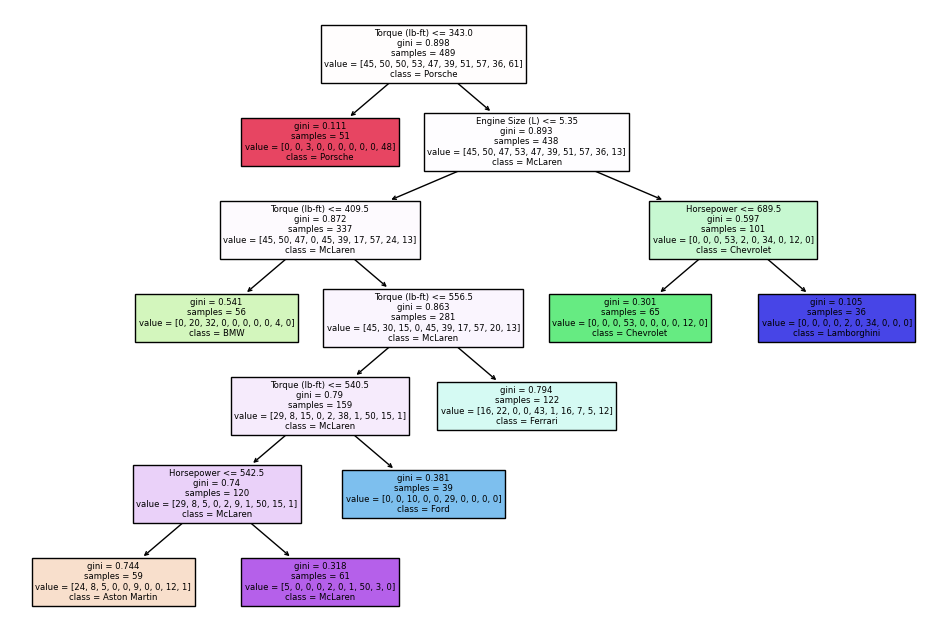

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(clf2, 
                feature_names=clf2.feature_names_in_,
                class_names=clf2.classes_,
                filled=True)

### ✍️Decision Tree Classifier Conclusion
The decision tree is about to classify the brands of cars accoring to the car's Engine Size (L),Horsepower and Torque (lb-ft). However, we can see that the gini score of them are not really good. If we wan to find a more accurate Classifier, I suggest to increase the number of nudes and the depth of the decision tree. Also, don't forget to be aware of overfitting.

## Kmeans 

Here, I want to use Engine Size (L),Horsepower and Torque (lb-ft) to see if I can classify the brands of cars. I will use the Kmeans, and also use PCA to decompose the dimensions of the data.

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)
y_km = kmeans.fit_predict(df2[cols2])

In [ ]:
y_km

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 2, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 2, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 2,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,

In [ ]:
df2['kmeans_cluster'] = y_km
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df2[cols])
df2[['PC1','PC2']] = X_pca

/tmp/ipykernel_207/727528674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['kmeans_cluster'] = y_km
/tmp/ipykernel_207/727528674.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['PC1','PC2']] = X_pca
/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

I will plot the graph of about the car brand after decomposition to 2 dimensions :" PC1" and "PC2"

In [ ]:
c3= alt.Chart(df2).mark_circle(size = 60).encode(
    x = 'PC1',
    y = 'PC2',
    color = alt.Color('Car Make:N', scale = alt.Scale(scheme='set1')),
    tooltip = ['Price (in USD):N',"Car Make"]
).properties(
    title = 'Car Brands'
)
c3

alt.Chart(...)

### ✍️Kmeans Conclusion
So we can see there is no obvious pattern by using Kmeans to group those data. Therefore, we can not decide the brand of the car just by using the Engine Size, Horsepower and the Torque.

## ✨(Extra)Price Count Plot

For this code reference :https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html

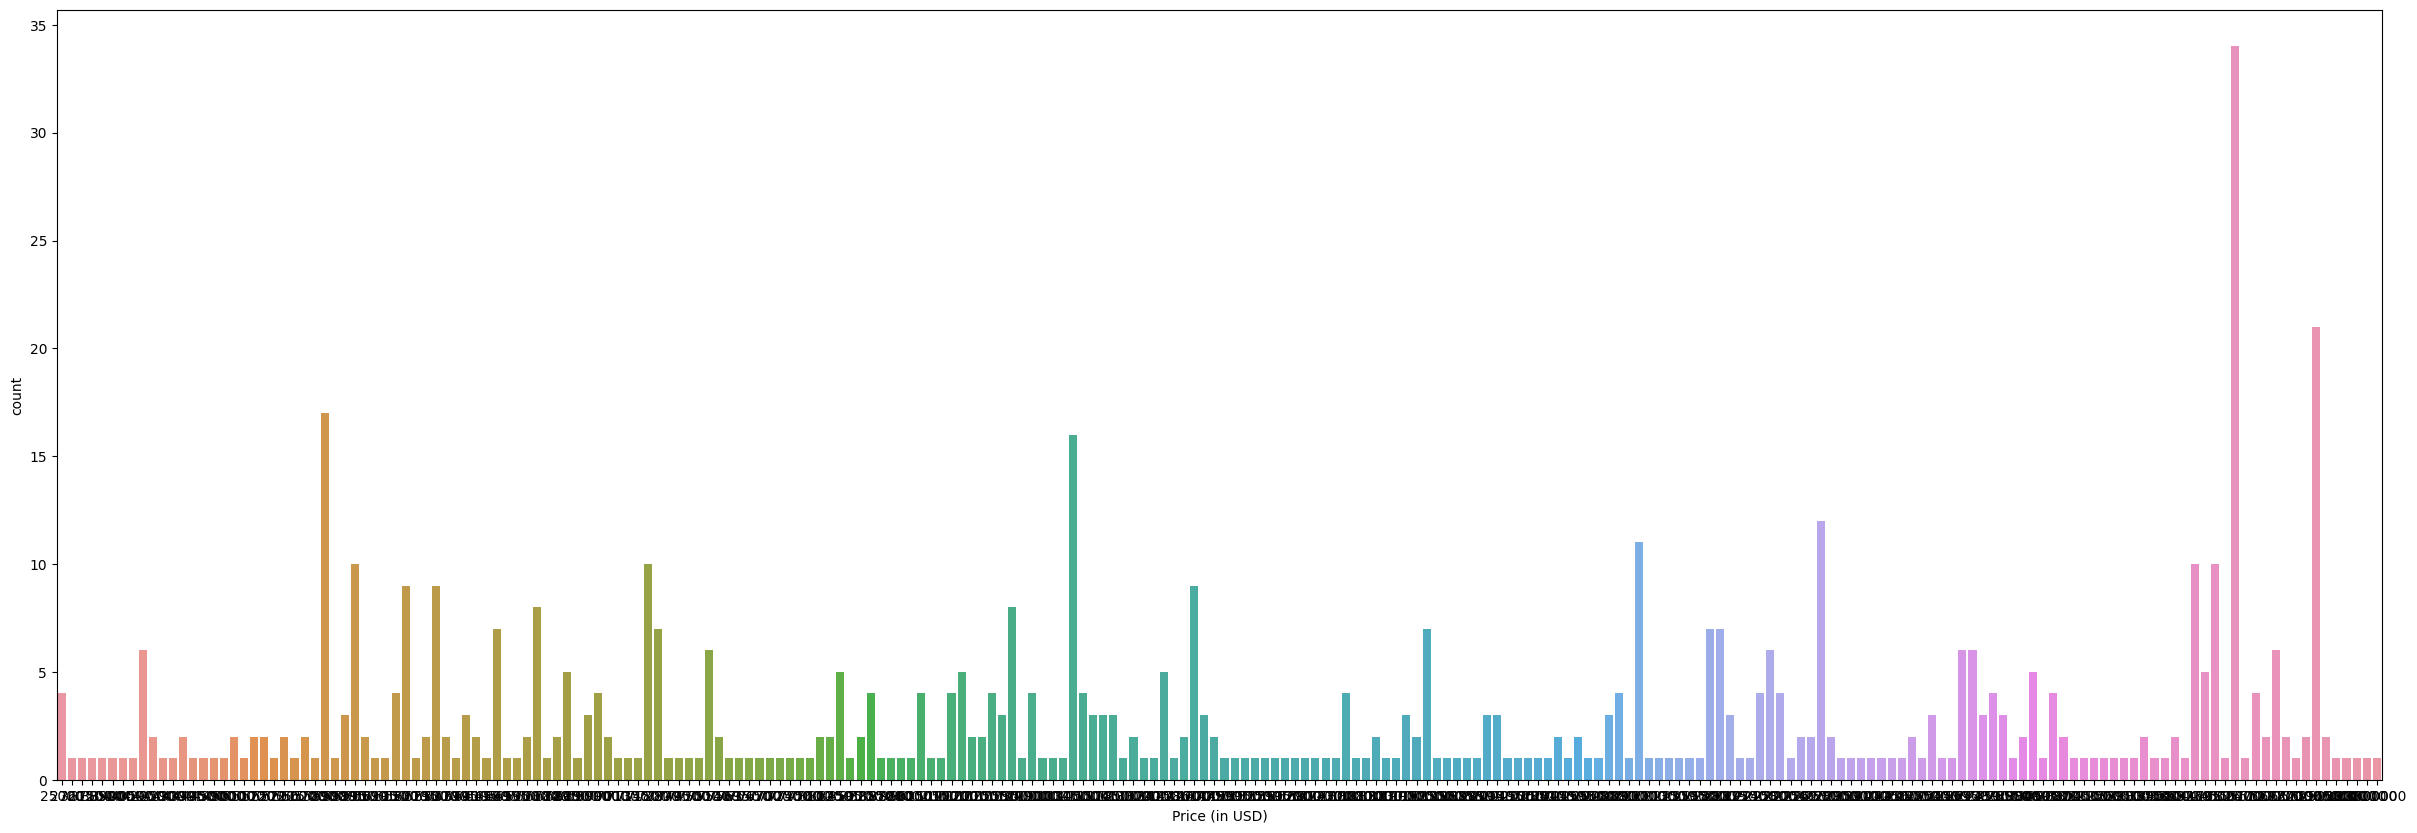

In [ ]:
plt.figure(figsize=(30,10))
sns.countplot(x="Price (in USD)", data=df2)
plt.show()

This plot above shows the Price (in USD) vs the count. We can see that the price that appear the most is highest pink bar. Let's figuer out which price it is and how many time this price has appeared in this dataframe.

In [ ]:
mode_price = df2['Price (in USD)'].value_counts().idxmax()
mode_price

500000

In [ ]:
max_count = df2['Price (in USD)'].value_counts().max()
max_count

34

So, the price that appears the most is $500000. It has appeared 34 times.

## 📝Summary
### Back to the question at the very top:
### 1.Does the configuration of the car have anything to do with the price?( Based on this dataset)
In my analysis process, I use ' Horsepower' as the configuration and price as the target. And the I find out that there is no obvious relationship between the Horsepower and price of a sport car.

### 2.Can we use those configurations to predict the price of a car?( Based on this dataset)
Yes. In my analysis process, I divided the price in to 3 levels: high, mid and low. Then, I use "Horsepower", "Torque (lb-ft)"as input features and the price level as output, the logistics regression model performed well to predict the price level of the car.

### 3.What price appear the most in this dataframe?
$500000 is the most common price of sports car in this dataset. And it has appeared 34 times.

## References

Your code above should include references.  Here is some additional space for references.

* What is the source of your dataset(s)?

My dataset comes from Kaggle: Sports Car Price Dataset:
https://www.kaggle.com/datasets/rkiattisak/sports-car-prices-dataset

* List any other references that you found helpful.

1. The reference of the code about finding the upper quartile and lower quartile:
https://www.codecademy.com/learn/learn-statistics-with-python/modules/quartiles-quantiles-and-interquartile-range/cheatsheet

2. The reference of the code about adding the "priceleve" column is generated by AI tool.


3. The reference of "to_numeric" function to convert given argument to a numeric type 
:https://www.educative.io/answers/what-is-the-tonumeric-function-in-pandas


4. The reference of the "Price Count Plot" part :
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html4.

5. The reference of the "Change the type of Price from 'object' to 'integer'" part :
https://www.datacamp.com/tutorial/python-data-type-conversion

6. This is the project of a previous student that I have imitated the layout of her/his work.
https://christopherdavisuci.github.io/UCI-Math-10-S23/Proj/StudentProjects/LoulouVivianMahfouz.html